<a href="https://colab.research.google.com/github/SajidNouval/Machine-Learning/blob/main/SajidNouval_24060122140110_LenseDataset2_2_ipynb_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sajid Nouval
24060122140110
Lense Dataset
https://archive.ics.uci.edu/dataset/58/lenses**

In [1]:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy

# Seaborn style on matplotlib plot, menentukan jenis graph. Untuk jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans

<ipython-input-3-3768428935ad>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv(url, names=names, delim_whitespace=True)


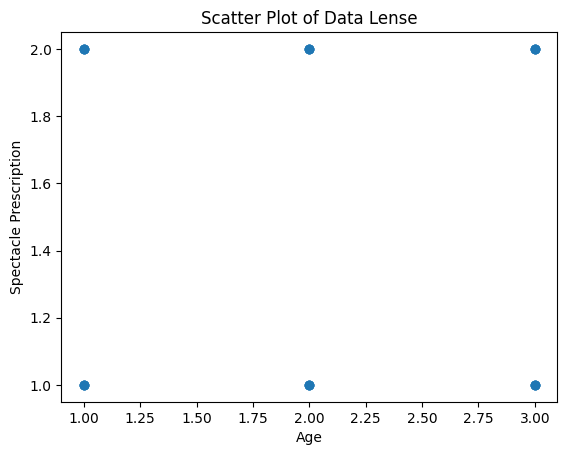

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
names = ['Age', 'Spectacle Prescription', 'Astigmatism', 'Tear Production Rate', 'Class']
dataset = pd.read_csv(url, names=names, delim_whitespace=True)

# Pilih dua fitur untuk divisualisasikan
# Ganti nama kolom sesuai dengan dataset Anda
features = dataset[['Age', 'Spectacle Prescription', 'Astigmatism', 'Tear Production Rate', 'Class']]

# Membuat scatter plot dari dua fitur yang dipilih
plt.scatter(features['Age'], features['Spectacle Prescription'])

# Berikan label sumbu x dan y
plt.xlabel('Age')
plt.ylabel('Spectacle Prescription')

# Berikan judul pada plot
plt.title('Scatter Plot of Data Lense')

# Tampilkan plot
plt.show()

In [7]:
X = np.array(list(zip(features['Age'], features['Spectacle Prescription']))).reshape(len(features['Spectacle Prescription']), 2) # Changed column names to existing columns in 'features'
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

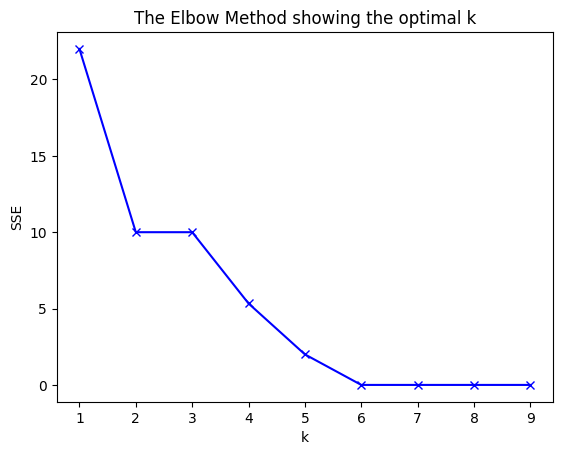

In [8]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

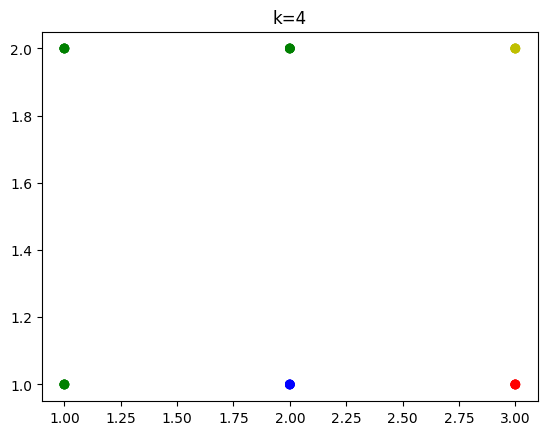

In [10]:
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.plot()
LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y'
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features['Age'], features['Spectacle Prescription'], c=label_color)  # Use column names for features
plt.title("k=4")
plt.show()

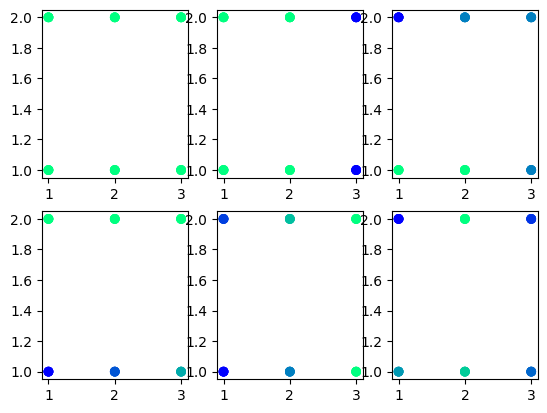

In [12]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)
for k in K:
    if k < 4:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 4
    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    # Access features using column names instead of numeric indices
    ax[row][column].scatter(features['Age'], features['Spectacle Prescription'], c=y_pred, cmap='winter_r')

plt.show()
